#Making Necessary Imports

In [ ]:
#link to the google drive - https://drive.google.com/drive/folders/1ZSf8h2PcLu5vTK3iiFjGahw1gI4_3tfq?usp=share_link
#Add it's shortcut to your drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=2607806defe850fcbd9b41d681555287faacc2b03c836227b0e3bd494b441926
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 10.0 MB/s eta 0:00:00


In [ ]:
#importing libraries
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import shap

# Data Preprocessing

In [ ]:
#loading data
data = pd.read_csv('/content/gdrive/MyDrive/DryBean/DryBeanDataset.csv')

In [ ]:
data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [ ]:
print(data.dtypes)

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


In [ ]:
X_dataset = data.iloc[:,0:-1]
Y_dataset = data.iloc[:,-1]

In [ ]:
X_dataset = X_dataset.astype('float32')
print(X_dataset.columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


In [ ]:
print (X_dataset.dtypes)

Area               float32
Perimeter          float32
MajorAxisLength    float32
MinorAxisLength    float32
AspectRation       float32
Eccentricity       float32
ConvexArea         float32
EquivDiameter      float32
Extent             float32
Solidity           float32
roundness          float32
Compactness        float32
ShapeFactor1       float32
ShapeFactor2       float32
ShapeFactor3       float32
ShapeFactor4       float32
dtype: object


In [ ]:
scaler = StandardScaler()
X_dataset_scaled = scaler.fit_transform(X_dataset)

In [ ]:
print(type(X_dataset_scaled))

<class 'numpy.ndarray'>


In [ ]:
#checking for null values
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
Y_dataset

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [ ]:
Y_dataset.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
labelencoder = LabelEncoder()
Y_dataset=labelencoder.fit_transform(Y_dataset)

In [ ]:
len(Y_dataset)

13611

'SEKER'-5, 'BARBUNYA'-0, 'BOMBAY'-1, 'CALI'-2, 'HOROZ'-4, 'SIRA'-6, 'DERMASON'-3
                              

In [ ]:
for i in range(13610):
  if(i==1):
    print(Y_dataset[i])
  elif(Y_dataset[i]!=Y_dataset[i+1]):
    print(Y_dataset[i+1])


5
0
1
2
4
6
3


In [ ]:
labelencoder.inverse_transform(Y_dataset)

array(['SEKER', 'SEKER', 'SEKER', ..., 'DERMASON', 'DERMASON', 'DERMASON'],
      dtype=object)

In [ ]:
X_dataset_scaled

array([[-0.84074855, -1.1433189 , -1.3065982 , ...,  2.4021726 ,
         1.9257233 ,  0.8383654 ],
       [-0.8291877 , -1.0139239 , -1.3959111 , ...,  3.100894  ,
         2.6897013 ,  0.77113384],
       [-0.80715716, -1.0788292 , -1.2523566 , ...,  2.2350914 ,
         1.8413559 ,  0.9167499 ],
       ...,
       [-0.37203825, -0.447833  , -0.4504783 , ...,  0.28920493,
         0.3363284 ,  0.39025527],
       [-0.3717654 , -0.4270286 , -0.42897415, ...,  0.22837465,
         0.24897328,  0.03644678],
       [-0.3713562 , -0.38755715, -0.2917357 , ..., -0.12777534,
        -0.2764814 ,  0.71371746]], dtype=float32)

In [ ]:
Y_dataset = Y_dataset.astype('float32')
Y_dataset

array([5., 5., 5., ..., 3., 3., 3.], dtype=float32)

In [ ]:
print(type(Y_dataset))

<class 'numpy.ndarray'>


In [ ]:
Names=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']

#TPOT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset_scaled,Y_dataset,
                                                    train_size=0.75, test_size=0.25,random_state=42)

In [ ]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [ ]:
# pipeline_optimizer.fit(X_train, y_train)
# print(pipeline_optimizer.score(X_test, y_test))
# pipeline_optimizer.export('tpot_iris_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9225114343039195

Generation 2 - Current best internal CV score: 0.9226094734725588

Generation 3 - Current best internal CV score: 0.9240786693546259

Generation 4 - Current best internal CV score: 0.9247647515837188

Generation 5 - Current best internal CV score: 0.9247647515837188

Best pipeline: ExtraTreesClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, criterion=entropy, max_features=0.9000000000000001, min_samples_leaf=14, min_samples_split=9, n_estimators=100)
0.9212459594475463


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


#SHAP

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset_scaled,Y_dataset,
                                                    train_size=0.85, test_size=0.15,random_state=42)

In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [ ]:
X_train_df = pd.DataFrame(X_train,columns =['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'])

In [ ]:
Y_train_df = pd.DataFrame(y_train,columns =['Class'])

In [ ]:
X_test_df = pd.DataFrame(X_test,columns =['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'])

In [ ]:
Y_test_df = pd.DataFrame(y_test,columns =['Class'])

In [ ]:
Y_test_df.value_counts()

Class
3.0      494
6.0      410
5.0      306
4.0      303
2.0      243
0.0      204
1.0       82
dtype: int64

In [ ]:
y_test

array([5., 0., 5., ..., 6., 5., 5.], dtype=float32)

In [ ]:
y_test_int = Y_test_df.astype('int')
labelencoder.inverse_transform(y_test_int)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array(['SEKER', 'BARBUNYA', 'SEKER', ..., 'SIRA', 'SEKER', 'SEKER'],
      dtype=object)

In [ ]:
import numpy as np
import pandas as pd
import shap
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from tpot.export_utils import set_param_recursive
from sklearn.ensemble import RandomForestClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9247647515837188
exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.9000000000000001, min_samples_leaf=14, min_samples_split=9, n_estimators=100)
)
# exported_pipeline=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
#                                        n_estimators=100, oob_score=True)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(X_train_df, Y_train_df)
print(exported_pipeline.score(X_test_df, Y_test_df)*100)
results = exported_pipeline.predict(X_test_df)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


92.31145935357493


In [ ]:
X_train_summary = shap.kmeans(X_train_df, 50)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [ ]:
shap.initjs()

In [ ]:
# explainer = shap.KernelExplainer(exported_pipeline.predict_proba,X_train_summary)
# shap_values = explainer.shap_values(X_test_df,feature_names = X_test_df.columns)

X does not have valid feature names, but PolynomialFeatures was fitted with feature names


  0%|          | 0/2042 [00:00<?, ?it/s]

X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not have valid feature names, but PolynomialFeatures was fitted with feature names
X does not

In [ ]:
# import os
# os.mkdir('/content/drive/MyDrive/shap_values')
# shap_df_1 = pd.DataFrame(shap_values[0])
# shap_df_1.to_csv('/content/drive/MyDrive/shap_values/shap_df_1',index=False)
# shap_df_2 = pd.DataFrame(shap_values[1])
# shap_df_2.to_csv('/content/drive/MyDrive/shap_values/shap_df_2',index=False)
# shap_df_3 = pd.DataFrame(shap_values[2])
# shap_df_3.to_csv('/content/drive/MyDrive/shap_values/shap_df_3',index=False)
# shap_df_4 = pd.DataFrame(shap_values[3])
# shap_df_4.to_csv('/content/drive/MyDrive/shap_values/shap_df_4',index=False)
# shap_df_5 = pd.DataFrame(shap_values[4])
# shap_df_5.to_csv('/content/drive/MyDrive/shap_values/shap_df_5',index=False)
# shap_df_6 = pd.DataFrame(shap_values[5])
# shap_df_6.to_csv('/content/drive/MyDrive/shap_values/shap_df_6',index=False)
# shap_df_7 = pd.DataFrame(shap_values[6])
# shap_df_7.to_csv('/content/drive/MyDrive/shap_values/shap_df_7',index=False)

In [ ]:
shap_1 = pd.read_csv('/content/gdrive/MyDrive/shap_values/shap_df_1')
shap_2 = pd.read_csv('/content/gdrive/MyDrive/shap_values/shap_df_2')
shap_3 = pd.read_csv('/content/gdrive/MyDrive/shap_values/shap_df_3')
shap_4 = pd.read_csv('/content/gdrive/MyDrive/shap_values/shap_df_4')
shap_5 = pd.read_csv('/content/gdrive/MyDrive/shap_values/shap_df_5') 
shap_6 = pd.read_csv('/content/gdrive/MyDrive/shap_values/shap_df_6')
shap_7 = pd.read_csv('/content/gdrive/MyDrive/shap_values/shap_df_7')
shap_1 = shap_1.to_numpy()
shap_2 = shap_2.to_numpy()
shap_3 = shap_3.to_numpy()
shap_4 = shap_4.to_numpy()
shap_5 = shap_5.to_numpy()
shap_6 = shap_6.to_numpy()
shap_7 = shap_7.to_numpy()
shap_values = []
shap_values.append(shap_1)
shap_values.append(shap_2)
shap_values.append(shap_3)
shap_values.append(shap_4)
shap_values.append(shap_5)
shap_values.append(shap_6)
shap_values.append(shap_7)

#Analysis

##Global Analysis

##Summary Plot

In [ ]:
Names = ['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA']

BARBUNYA


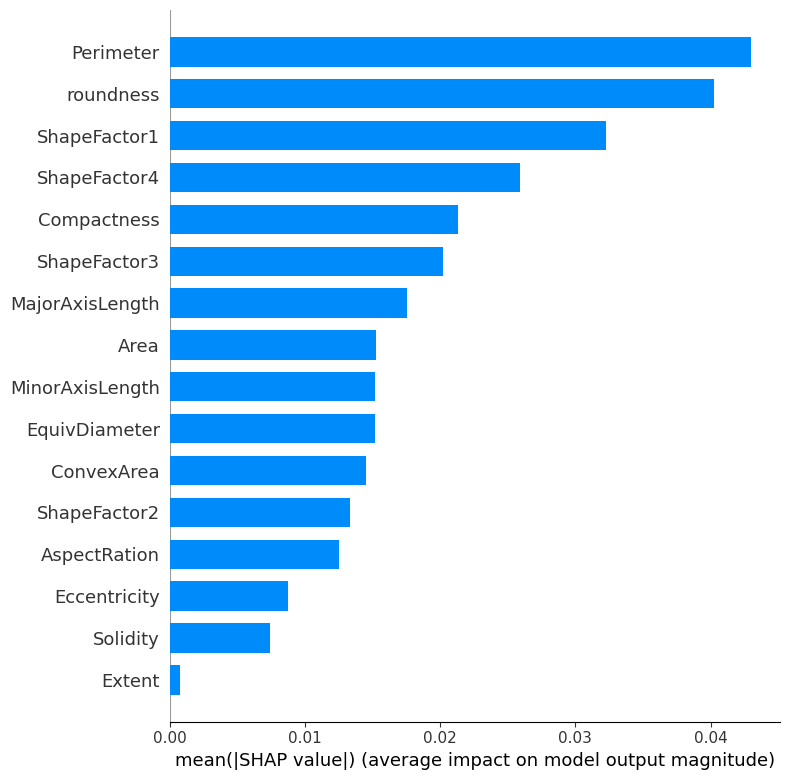

BOMBAY


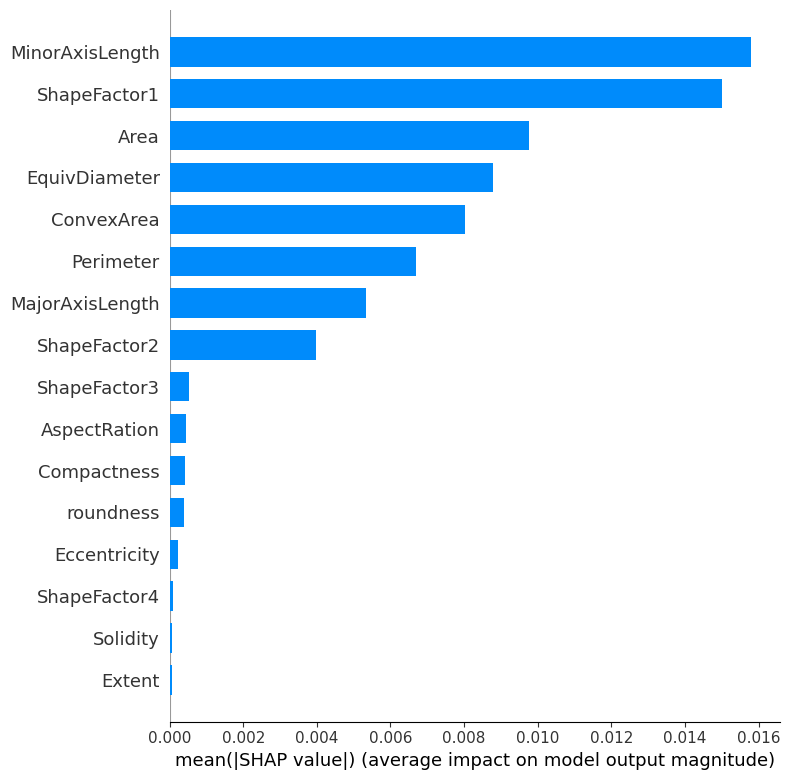

CALI


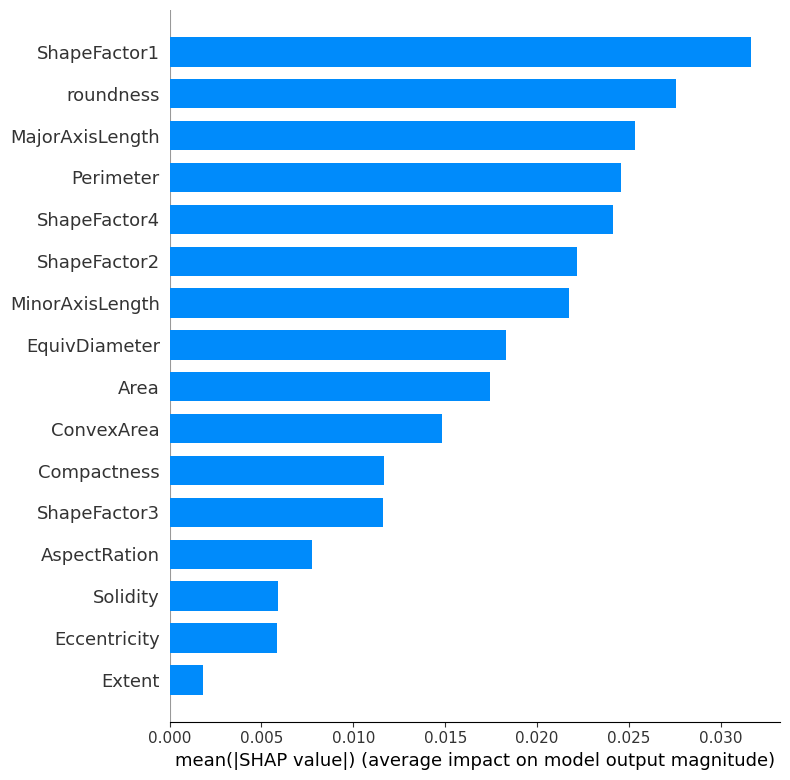

DERMASON


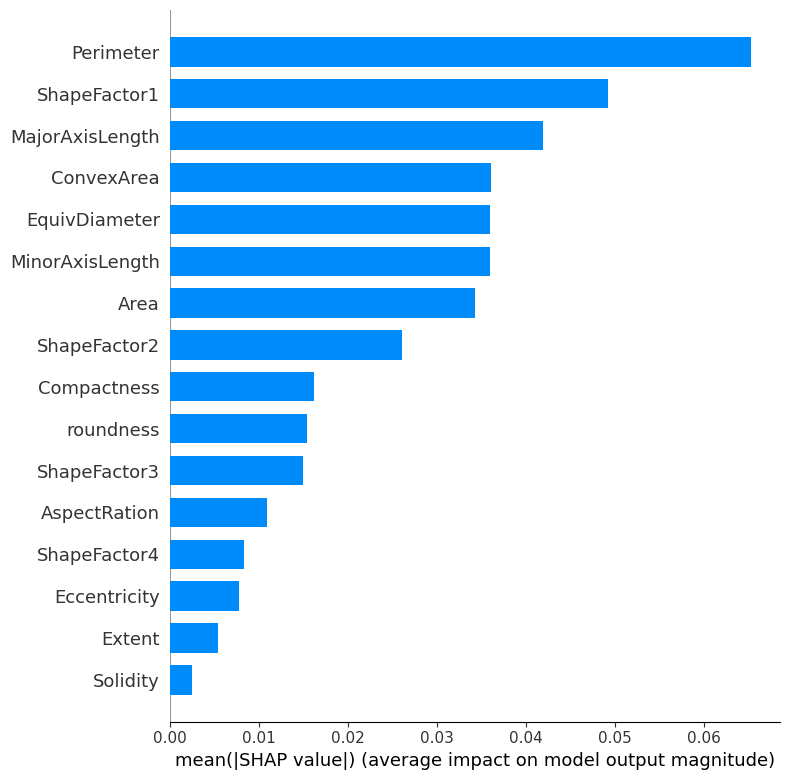

HOROZ


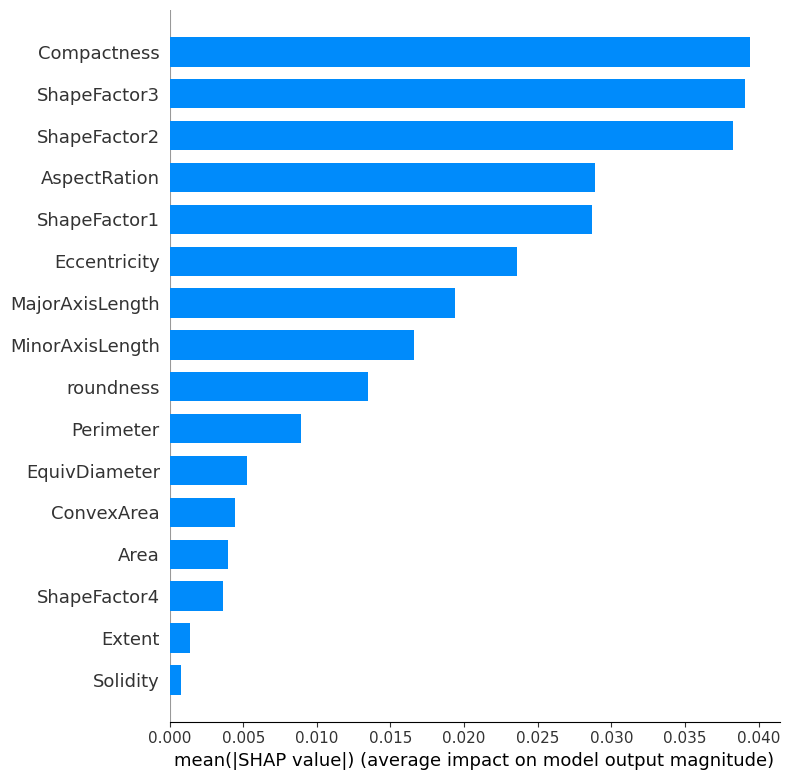

SEKER


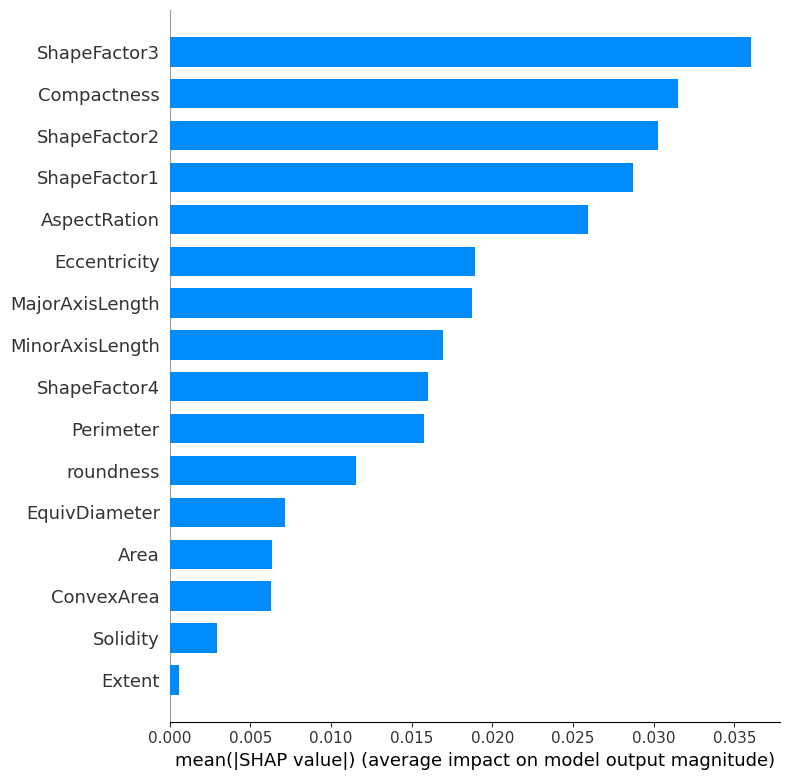

SIRA


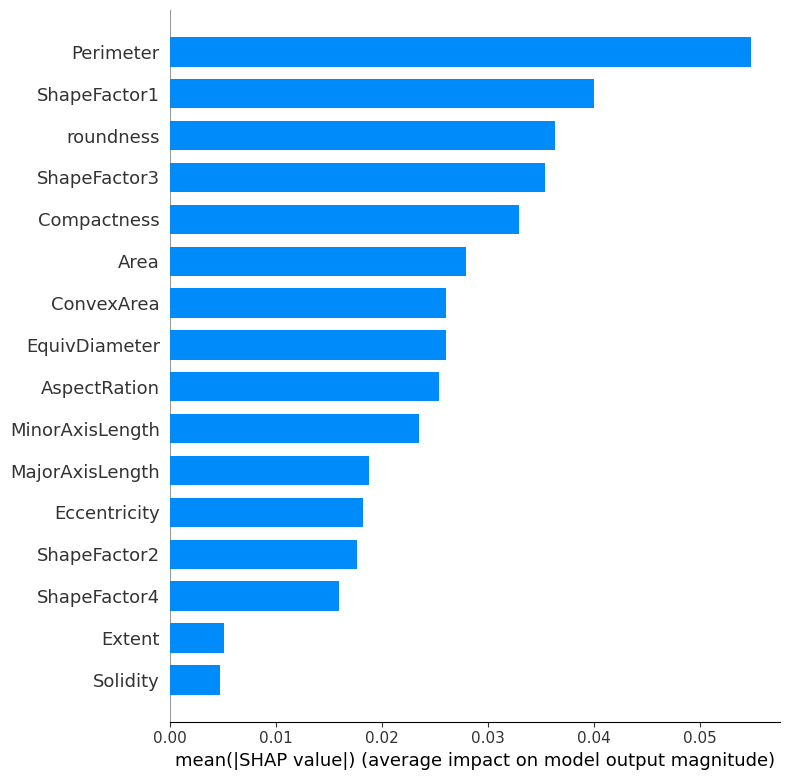

In [ ]:
# for i in range(7):
#  print(Names[i])
#  shap.summary_plot(shap_values[i], X_test_df,plot_type="bar")

'SEKER'-5, 'BARBUNYA'-0, 'BOMBAY'-1, 'CALI'-2, 'HOROZ'-4, 'SIRA'-6, 'DERMASON'-3

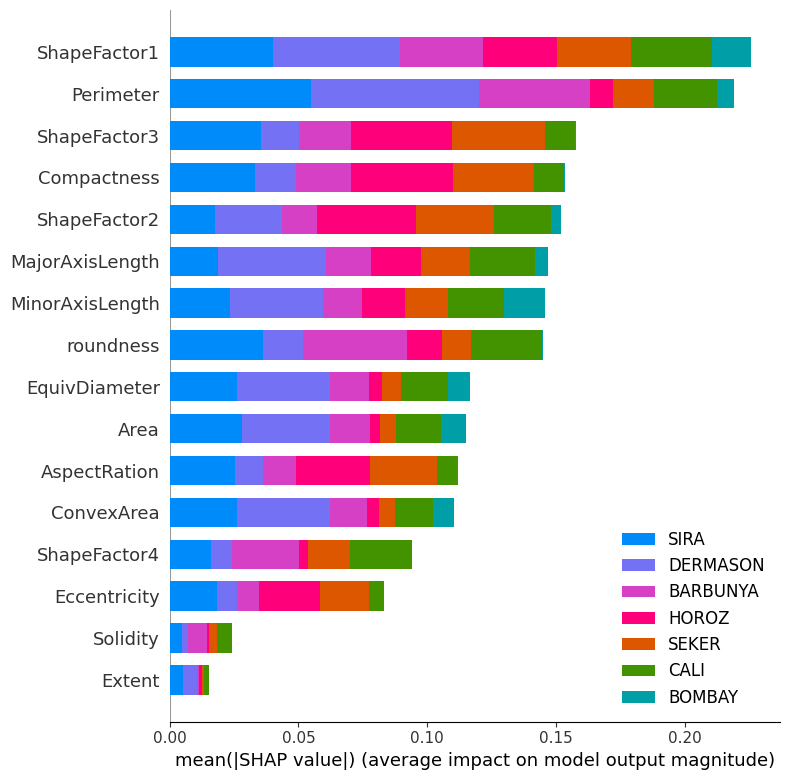

In [ ]:
# shap.summary_plot(shap_values, X_test_df,plot_type="bar",class_names=Names)

##Force Plot

In [ ]:
# explainer.expected_value

array([0.08675714, 0.03804638, 0.12353209, 0.25201475, 0.14223897,
       0.14837835, 0.20903231])

In [ ]:
# shap.initjs()
# shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test_df.iloc[0, :])

In [ ]:
# shap.initjs()
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_df)

##Dependence Plot

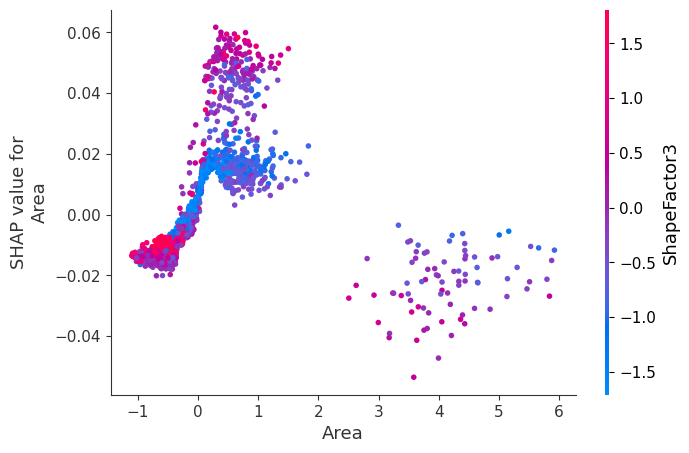

In [ ]:
# shap.dependence_plot("Area", shap_values[0], X_test_df)

##Local Analysis

Waterfall Plot

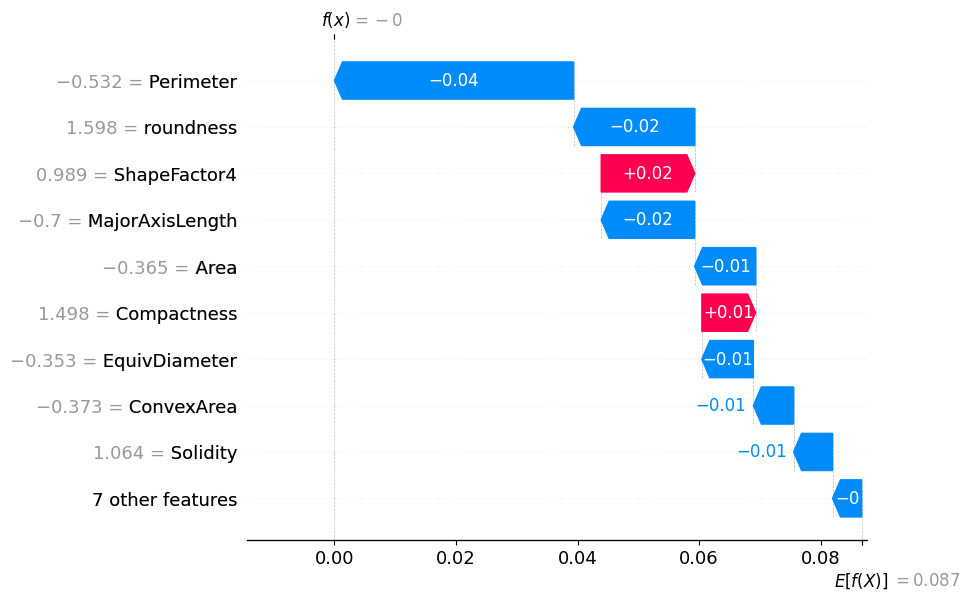

In [ ]:
# shap.waterfall_plot(shap.Explanation(values=shap_values[0][0], 
#                                               base_values=explainer.expected_value[0], data=X_test_df.iloc[0,:],  
#                                          feature_names=X_test_df.columns.tolist()))